In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import visualstimulation as vs
import vian
import expipe
import matplotlib.pylab as plt
import numpy as np
import quantities as pq
%matplotlib notebook

C:\Users\malinbro\AppData\Local\Continuum\anaconda3\envs\expipe\lib\site-packages\elephant\spade.py:83: UserWarning: fim.so not found in elephant/spade_src folder,you are using the python implementation of fast fca
  'you are using the python implementation of fast fca')


In [3]:
project_path = "C:\\apps\expipe-projects\probe_v1"

project = expipe.get_project(project_path)
actions = project.actions

In [4]:
actions

In [5]:
action = actions['1053-010319-6']

In [6]:
data_path = vian.get_data_path(action)

Project path: C:\apps\expipe-projects\probe_v1
Data path: actions\1053-010319-6\data\main.exdir


In [14]:
epochs = vs.load_epochs(data_path)

KeyboardInterrupt: 

In [8]:
channel_idx = 0
sptr = vs.load_spiketrains(data_path, channel_idx)

In [16]:
for st in sptr:
    print(st)

[  1.91113333   3.61886667   3.68543333   3.96643333   4.1567
   8.09073333   8.17186667   8.2052       8.31743333   8.77266667
  10.27        12.9617      13.66146667  13.72373333  14.57863333
  15.91556667  16.09636667  16.12196667  16.12493333  16.47063333
  16.86576667  17.06443333  19.71746667  20.49066667  21.3812
  21.72656667  21.77136667  21.89336667  22.1414      22.34413333
  22.37696667  24.48936667  24.52376667  25.22606667  26.18563333
  26.2984      26.31376667  26.53036667  28.42776667  28.52786667
  29.2276      29.2402      30.4797      30.49086667  31.6199
  31.6618      32.07443333  32.58913333  32.62546667  32.7994
  32.8084      36.02113333  37.82466667  37.83703333  37.94776667
  40.50153333  40.52853333  40.8719      42.40463333  42.73556667
  43.71336667  43.85486667  45.2847      45.2876      45.42643333
  45.8443      47.3373      48.0408      49.14476667  49.86453333
  50.1942      51.3704      52.31523333  53.74416667  54.61
  54.68226667  54.78366667  54.8

 168.4402     168.4658     168.47703333 168.52926667] s
[  0.45676667   1.9129       2.15526667   4.14283333   4.85863333
   5.18833333   7.4391       8.11043333   8.12213333   8.1311
   9.8428      12.5328      13.8473      14.72163333  15.64223333
  16.1054      16.11436667  16.14453333  16.1825      16.52616667
  16.53146667  17.18653333  17.41136667  20.9067      21.02366667
  21.74543333  21.75676667  21.806       21.82613333  21.90783333
  22.34566667  26.1825      26.21103333  26.2485      26.26753333
  26.36373333  26.36893333  26.5143      26.61653333  26.72213333
  29.07886667  30.4775      31.679       31.78413333  32.59546667
  32.73233333  33.16043333  35.37346667  35.4124      36.2427
  37.62456667  37.781       37.8364      37.99603333  39.99606667
  40.08073333  43.57103333  43.61823333  43.7338      44.64893333
  44.94833333  45.22783333  45.85753333  45.9124      46.94756667
  49.76253333  50.08146667  50.2671      50.28413333  50.47593333
  54.52856667  54.60476667  

### How to plot spiketrains?

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, st in enumerate(sptr):
    ax.plot(st.times, i * np.ones(len(st)), '|', ls='')

AttributeError: 'list' object has no attribute 'times'

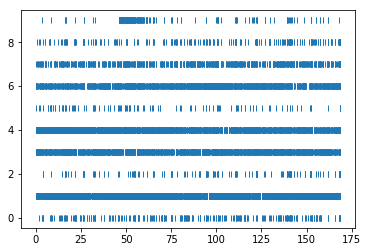

In [13]:
def raster_plot(ax, spiketrains, T=[0., 10.], epo=None):
    '''
    Arguments
    ---------
    ax : matplotlib.axes._subplots.AxesSubplot
    spiketrains : list of neo.SpikeTrain objects
    T : length 2 list/tuple of floats
        time interval in seconds
    epo : None or neo.Epoch object
        show onset/offset times of stimuli
    '''
    yticklabels = []
    for i, spiketrain in enumerate(sptr):
        yticklabels.append('{} ({})'.format(spiketrain.name, spiketrain.description))
        ax.plot(spiketrain, np.zeros(spiketrain.size)+i, 'C0|')
    if epochs is not None:
        axis = ax.axis('tight')
        ax.vlines(epochs.times, axis[2], axis[3], 'g')
        ax.vlines((epochs.times+epochs.durations), axis[2], axis[3], 'r')        
    ax.set_yticks(range(len(sptr)))
    ax.set_yticklabels(yticklabels)
    ax.set_ylabel('unit id')
    ax.set_xlim(T)
    ax.set_xlabel('t (s)')
    ax.set_title('spike raster')

fig, ax = plt.subplots(1,1)
raster_plot(ax, sptr, T=[10., 20.], epo=epochs)

### How to plot waveforms?

In [ ]:
wf = sptr[1].waveforms
print(wf.shape)

In [ ]:
wf_mean = np.mean(wf, axis=0)
print(wf_mean.shape)

In [ ]:
plt.figure()
_ = plt.plot(wf_mean.T)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i, w in enumerate(wf_mean):
    _ = ax.plot(w + i*25, 'k')

### How to load LFP?

In [27]:
lfp = vian.load_lfp(data_path)

In [28]:
lfp.duration

array(168.619) * 1/Hz

<IPython.core.display.Javascript object>


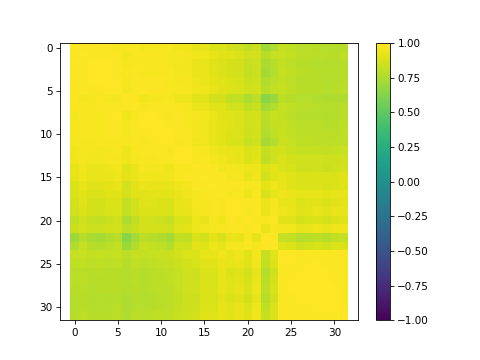

In [29]:
fig, ax = plt.subplots(1, 1)
im = ax.imshow(np.corrcoef(lfp.T), vmin=-1, vmax=1)
ax.axis(ax.axis('equal'))
fig.colorbar(im)

<IPython.core.display.Javascript object>


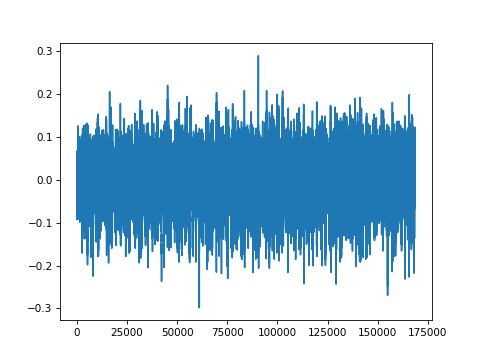

In [30]:
plt.figure()
plt.plot(lfp.T[0])

<IPython.core.display.Javascript object>


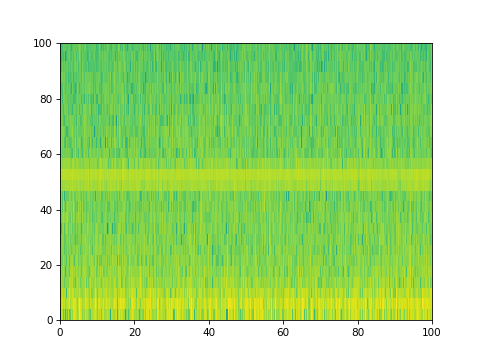

(0, 100)

In [31]:
# plt.figure()
# _ = plt.specgram(np.array(lfp.T[0]), Fs=1000)

fig = plt.figure()
ax = fig.add_subplot(111)
_ = plt.specgram(np.array(lfp.T[0]), Fs=1000)
#ax.set_xlim([0, 5000])
ax.set_ylim([0, 100])

<IPython.core.display.Javascript object>


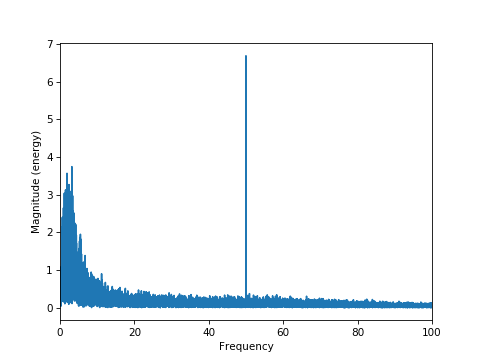

(0, 100)

In [39]:
plt.figure()
_ = plt.magnitude_spectrum(np.array(lfp.T[0].rescale('uV')), Fs=1000)
plt.xlim([0, 100])

<IPython.core.display.Javascript object>


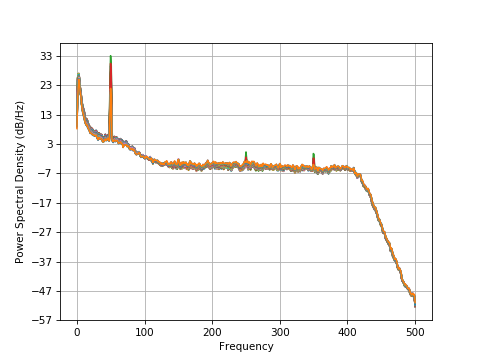

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
for ciao in lfp.T:
    _ = ax.psd(np.array(ciao.rescale('uV')), NFFT=1024, Fs=1000)

In [20]:
oe_epoch = epochs[0]
ps_epoch = epochs[1]

In [21]:
ps_epoch.annotations

{'exdir_path': '/epochs/psychopy',
 'lazy_shape': None,
 'provenance': 'psychopy'}

In [ ]:
orients = ps_epoch.labels
print(orients)

In [ ]:
# make trials 
trials = vs.make_spiketrain_trials(sptr[3], oe_epoch)

In [ ]:
vs.add_orientation_to_trials(trials, orients)
print(trials[4].annotations)

In [ ]:
vs.plot_raster(trials)

In [ ]:
orient_trials = vs.make_orientation_trials(trials)
# Compute tuing
rates, orients = vs.compute_orientation_tuning(orient_trials)

In [ ]:
plt.figure()
plt.plot(orients, rates, '-o')
plt.xlabel("Orientation")
plt.xlabel("Rate")

In [ ]:
vs.polar_tuning_curve(orients=orients, rates=rates)

In [ ]:
fig = vs.orient_raster_plots(trials)

In [ ]:
fig = vs.polar_tuning_curve

In [ ]:
import visualstimulation as vs
import os

In [ ]:
project = os.path.realpath("C:\\apps\\expipe-project\\MROS_V2")
action_id = "1823-060219-2"
o = vs.represent.visual_data(project, action_id)

In [ ]:
o_sptr = vs.load_spiketrains(str(o.data_path), 0)

In [ ]:
o.get_plot()

In [22]:
from elephant.sta import spike_triggered_average

C:\Users\malinbro\AppData\Local\Continuum\anaconda3\envs\expipe\lib\site-packages\elephant\spade.py:83: UserWarning: fim.so not found in elephant/spade_src folder,you are using the python implementation of fast fca
  'you are using the python implementation of fast fca')


In [39]:
# create epochs spike_trains
import neo
import quantities as pq
times = oe_epoch.times
epochs_spiketrain = neo.SpikeTrain(times=times, t_stop=np.max(times))

In [40]:
# notch
import scipy.signal as ss
fs = lfp.sampling_rate.magnitude
notch_filter = 50.

wn = notch_filter / (0.5*fs)
Q = 100
b, a = ss.iirnotch(wn, Q)

In [41]:
fs

array(1000.)

In [42]:
lfp_filt = ss.filtfilt(b, a, np.array(lfp), axis=0)
lfp_filt = neo.AnalogSignal(lfp_filt, units=lfp.units, t_stop=lfp.t_stop, sampling_rate=lfp.sampling_rate)

C:\Users\malinbro\AppData\Local\Continuum\anaconda3\envs\expipe\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


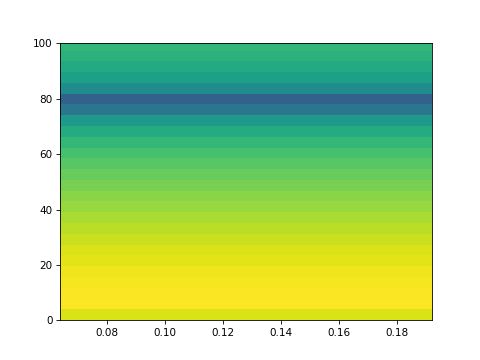

C:\Users\malinbro\AppData\Local\Continuum\anaconda3\envs\expipe\lib\site-packages\matplotlib\mlab.py:1246: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=32).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))


(0, 100)

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
_ = plt.specgram(np.array(lfp_filt.T[25]), Fs=1000)
#ax.set_xlim([0, 5000])
ax.set_ylim([0, 100])

In [ ]:
plt.figure()
plt.plot(lfp.T[0])
plt.plot(lfp_filt.T[0])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
for ciao in lfp_filt.T:
    _ = ax.psd(np.array(ciao), NFFT=1024, Fs=1000)
ax.set_xlim([0, 100])
ax.set_ylim([-70, -20])

fig = plt.figure()
ax = fig.add_subplot(111)
for ciao in lfp.T:
    _ = ax.psd(np.array(ciao), NFFT=1024, Fs=1000)
ax.set_xlim([0, 100])
ax.set_ylim([-70, -20])

<IPython.core.display.Javascript object>

In [ ]:
sta.shape

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
max_ = np.max(sta)
trial_times = np.linspace(-500, 1000, len(sta))
for i, s in enumerate(sta.T):
    ax.plot(trial_times, s + i*0.5*max_, 'k')
ax.axvline(0, color='r')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
trial_times = np.linspace(-800, 1000, len(sta))
ax.plot(trial_times, sta.T[25], 'k')
ax.axvline(1, color='r')

In [9]:
plt.figure()
plt.imshow(sta.T)
plt.axvline(500, color='r')
plt.axis('auto')

NameError: name 'sta' is not defined

<Figure size 432x288 with 0 Axes>

In [10]:
import expipe 
from expipe_plugin_cinpla.widgets import browser

14:08:25 [I] klustakwik KlustaKwik2 version 0.2.6


In [11]:
browser.display('c://apps/expipe-projects/probe_v1/')

In [ ]:
np.savetxt('test.csv', lfp_filt.T, delimiter=',')

In [8]:
!pip list

Package                       Version           Location                                                                         
----------------------------- ----------------- ---------------------------------------------------------------------------------
alabaster                     0.7.12            
appdirs                       1.4.3             
asn1crypto                    0.24.0            
astropy                       3.0.4             
atomicwrites                  1.3.0             
attrs                         19.1.0            
Automat                       0.7.0             
Babel                         2.6.0             
backcall                      0.1.0             
bcrypt                        3.1.4             
bleach                        2.1.4             
certifi                       2018.8.24         
cffi                          1.11.5            
chardet                       3.0.4             
click                         6.7               
color

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
